In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter('ignore')

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
pd.read_csv('VariableDescriptions.csv')

,Variables,Description
0,distance_to_solar_noon,Angular distance to solar noon measured in rad...
1,temperature,Daily average temperature measured in degrees ...
2,wind_direction,Daily average wind direction measured in degre...
3,wind_speed,Daily average wind speed measured in meters pe...
4,sky_cover.,Sky cover on a five-step scale from 0 to 4 wit...
5,visibility,Atmospheric visibility measured in kilometers.
6,humidity,Relative humidity expressed as a percentage.
7,average_wind_speed,"Average wind speed during the 3 hours, the mea..."
8,average_pressure,Average barometric pressure during the 3 hours...
9,power_generated,Solar PV power generated in Joules for each 3 ...


In [3]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
subm = pd.read_csv('SampleSubmission.csv')

In [4]:
train.head(10)

,ID,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,ID_000C6D,0.168350,52,6,1.1,0,6.0,80,8.0,766.572,22482
1,ID_001BF0,0.349153,63,26,16.3,4,10.0,81,16.0,760.984,1755
2,ID_007316,0.857875,63,27,13.9,4,10.0,93,11.0,758.444,0
3,ID_009D0E,0.150113,70,30,9.7,0,9.0,71,3.0,759.968,27771
4,ID_00B4A1,0.465986,63,27,16.0,1,10.0,72,16.0,759.460,1748
5,ID_00BF67,0.824742,53,33,3.7,3,9.0,86,6.0,764.286,0
6,ID_00C08A,0.749571,48,4,3.8,4,4.0,89,6.0,766.572,0
7,ID_00C719,0.479241,63,27,13.5,3,10.0,81,13.0,760.984,1661
8,ID_00DEEA,0.565771,50,28,5.9,0,10.0,69,16.0,762.508,247
9,ID_00EA53,0.753512,61,27,15.8,4,10.0,90,13.0,758.698,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           2043 non-null   object 
 1   distance-to-solar-noon       2043 non-null   float64
 2   temperature                  2043 non-null   int64  
 3   wind-direction               2043 non-null   int64  
 4   wind-speed                   2043 non-null   float64
 5   sky-cover                    2043 non-null   int64  
 6   visibility                   2043 non-null   float64
 7   humidity                     2043 non-null   int64  
 8   average-wind-speed-(period)  2043 non-null   float64
 9   average-pressure-(period)    2043 non-null   float64
 10  power-generated              2043 non-null   int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 175.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           877 non-null    object 
 1   distance-to-solar-noon       877 non-null    float64
 2   temperature                  877 non-null    int64  
 3   wind-direction               877 non-null    int64  
 4   wind-speed                   877 non-null    float64
 5   sky-cover                    877 non-null    int64  
 6   visibility                   877 non-null    float64
 7   humidity                     877 non-null    int64  
 8   average-wind-speed-(period)  876 non-null    float64
 9   average-pressure-(period)    877 non-null    float64
dtypes: float64(5), int64(4), object(1)
memory usage: 68.6+ KB


In [7]:
train.isnull().sum()

ID                             0
distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    0
average-pressure-(period)      0
power-generated                0
dtype: int64

In [8]:
train.duplicated().sum()

0

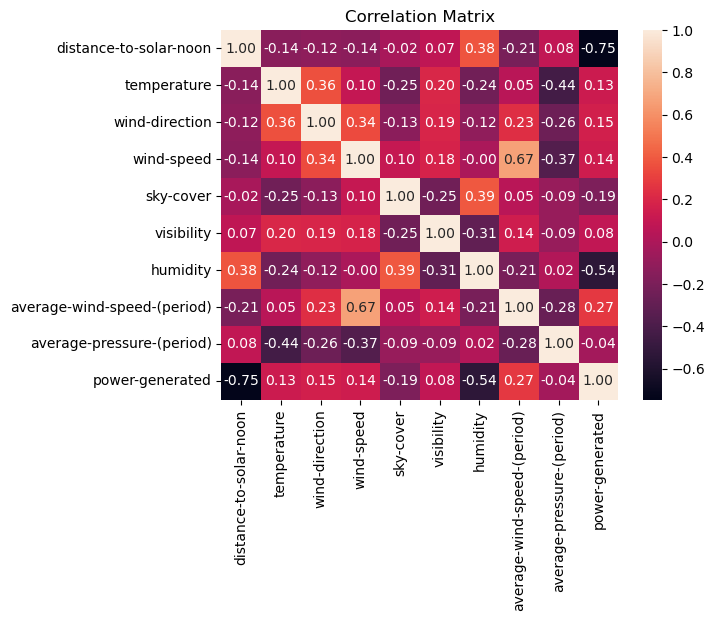

In [9]:
sns.heatmap(train.corr(), annot=True, fmt=".2f")
plt.title("Correlation Matrix");

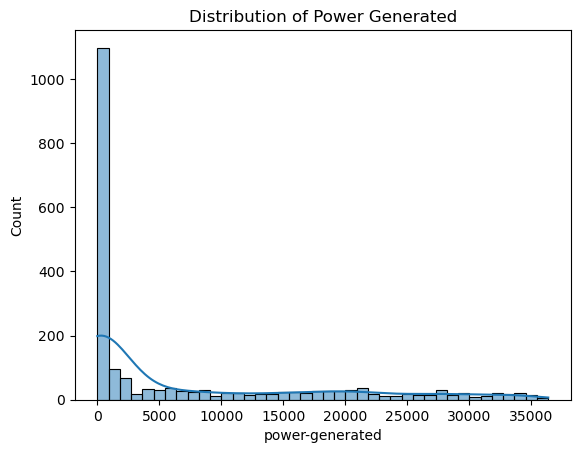

In [10]:
sns.histplot(train['power-generated'], kde=True, bins=40)
plt.title("Distribution of Power Generated");

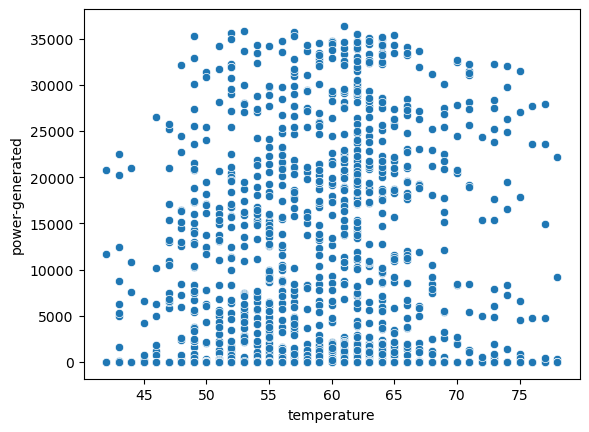

In [11]:
sns.scatterplot(data=train, x='temperature', y='power-generated');

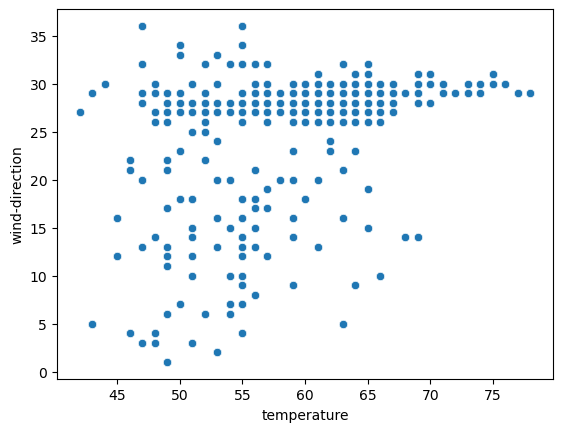

In [12]:
sns.scatterplot(data=train, x='temperature', y='wind-direction');

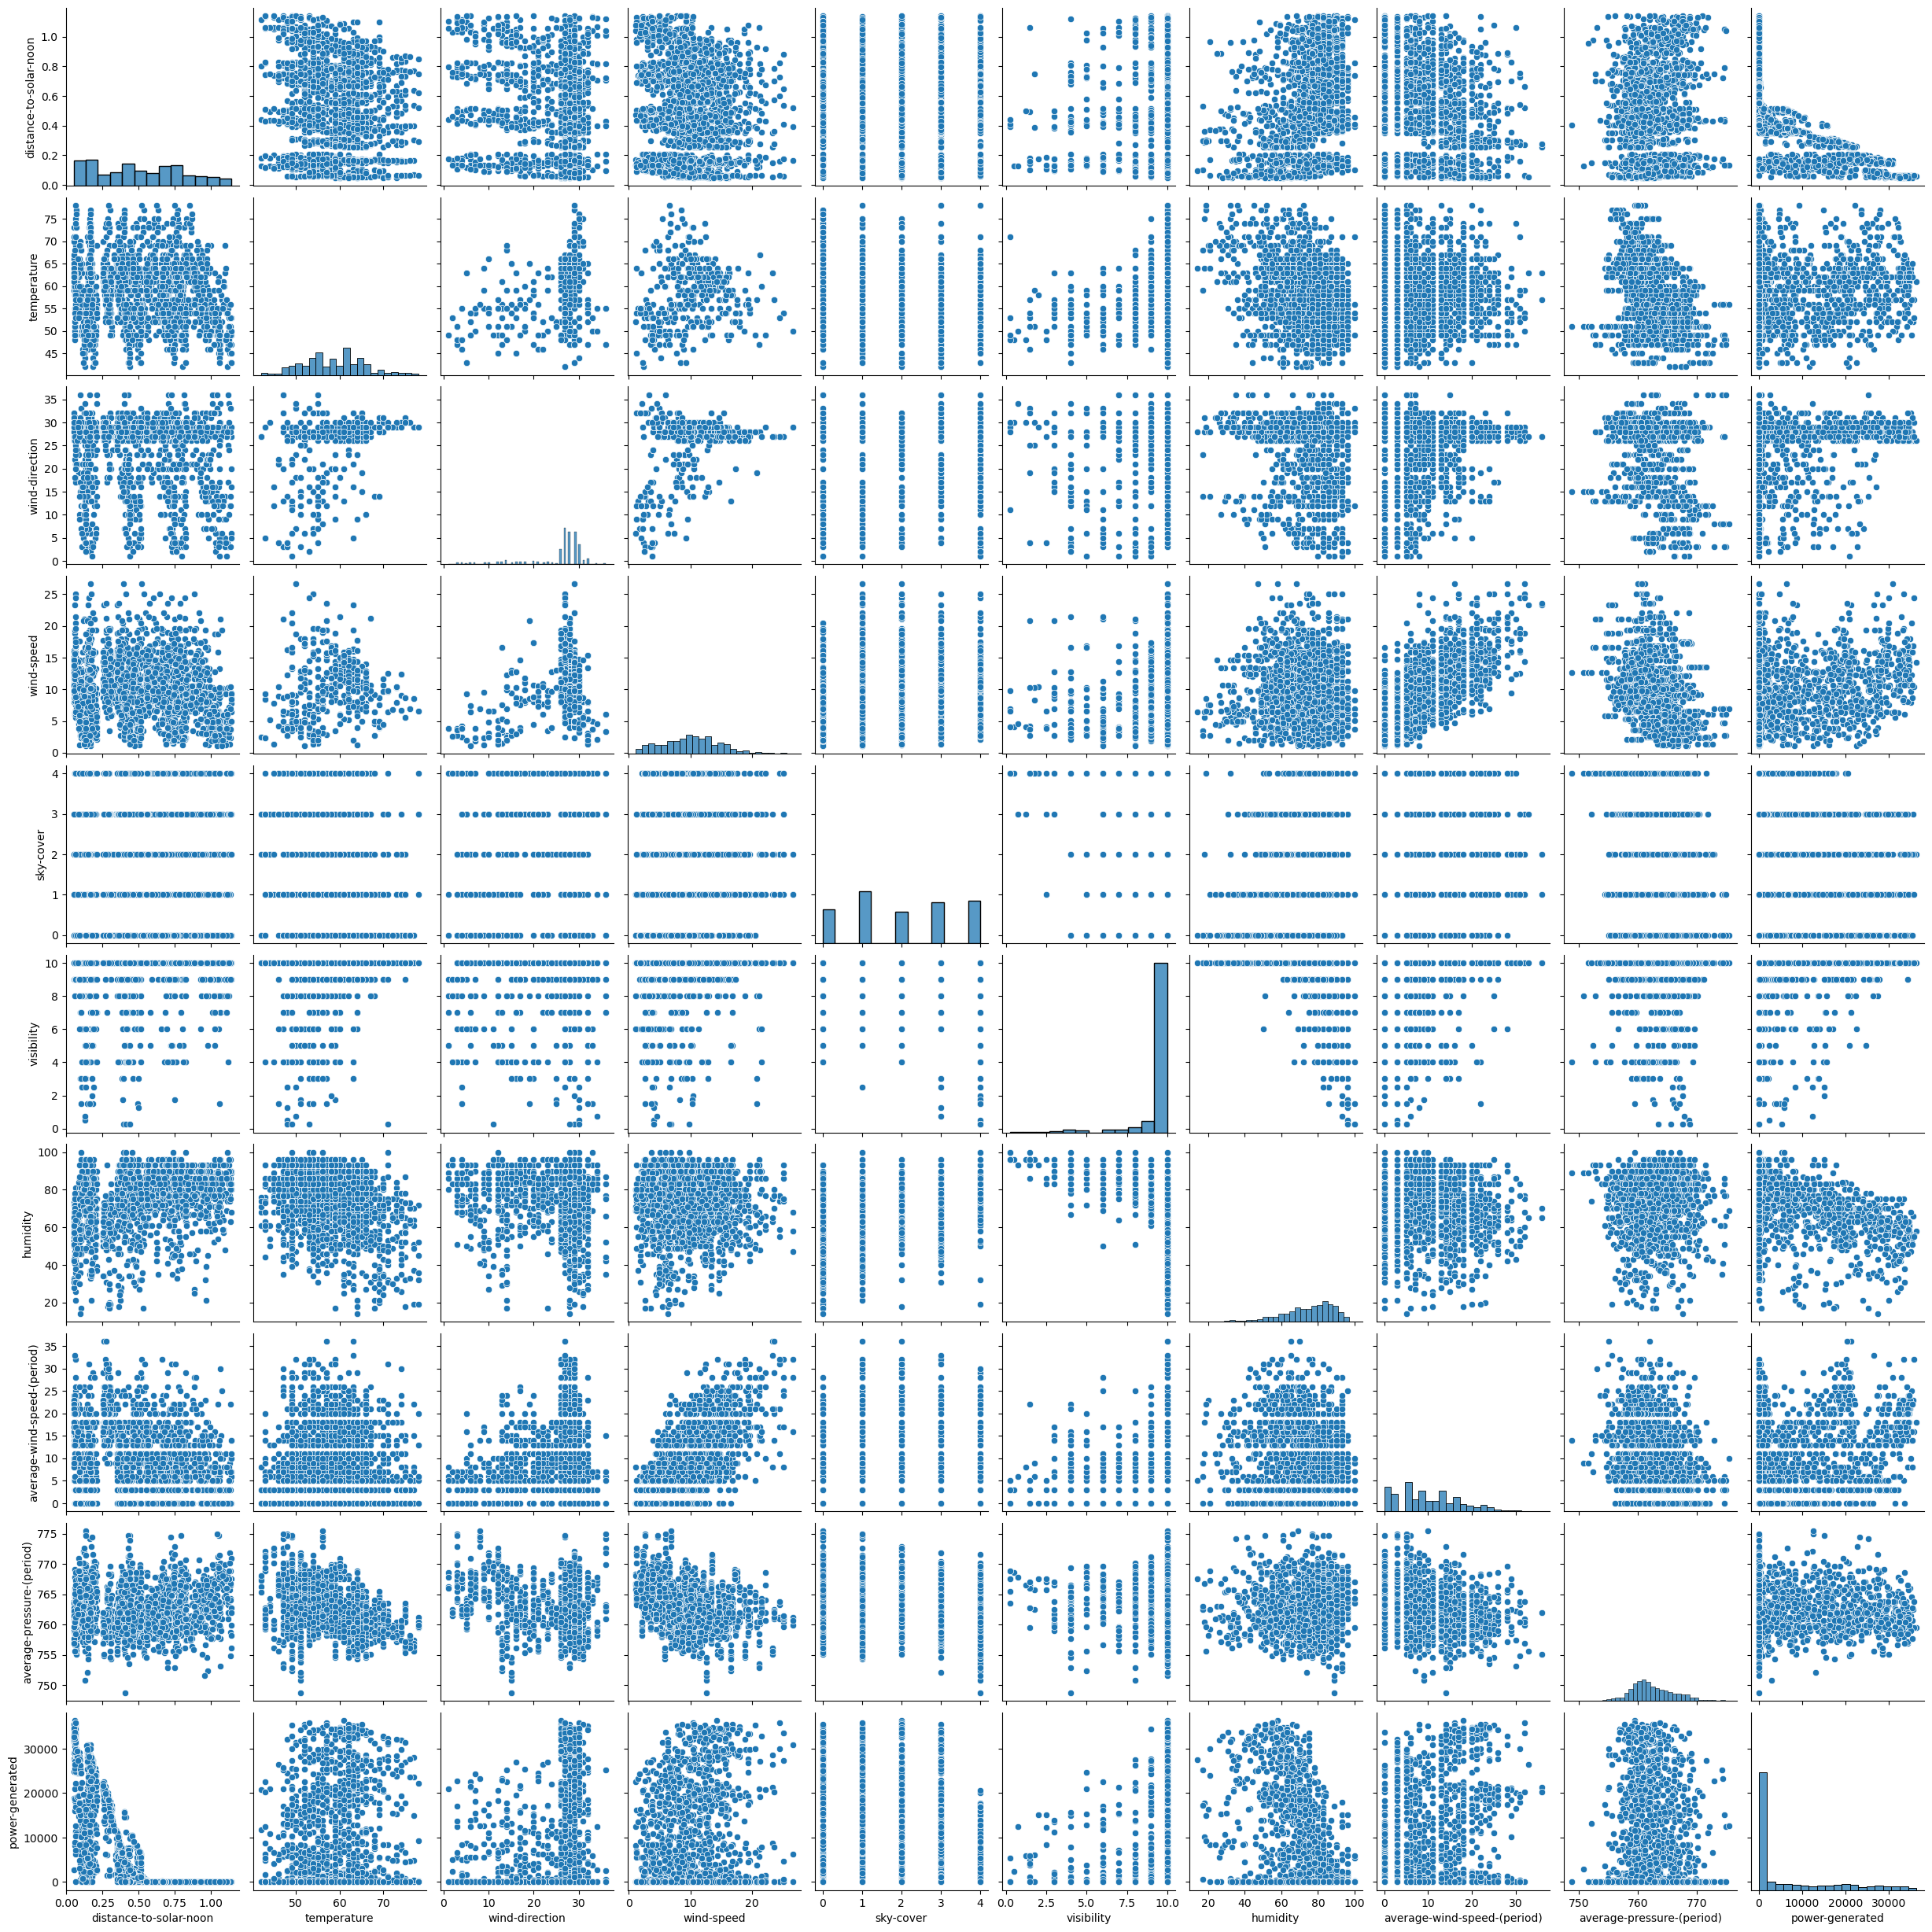

In [13]:
sns.pairplot(train);

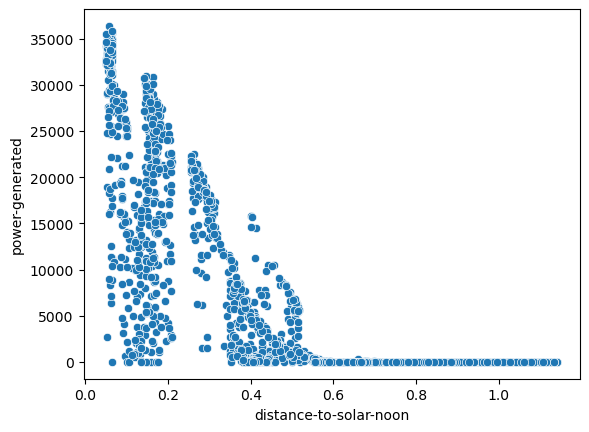

In [14]:
sns.scatterplot(data=train, x='distance-to-solar-noon', y='power-generated');

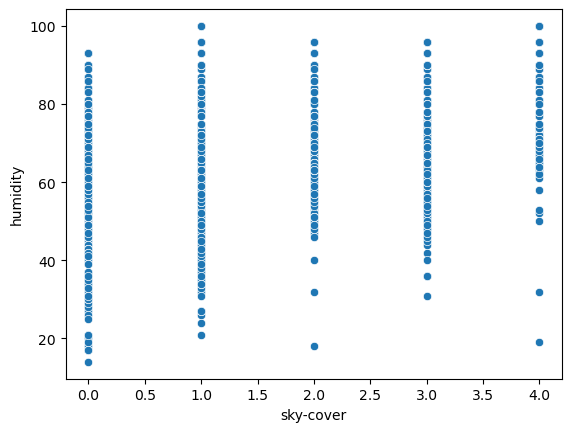

In [15]:
sns.scatterplot(data=train, x='sky-cover', y='humidity');

## FEATURE ENGINEERING

In [10]:
train.columns

Index(['ID', 'distance-to-solar-noon', 'temperature', 'wind-direction',
       'wind-speed', 'sky-cover', 'visibility', 'humidity',
       'average-wind-speed-(period)', 'average-pressure-(period)',
       'power-generated'],
      dtype='object')

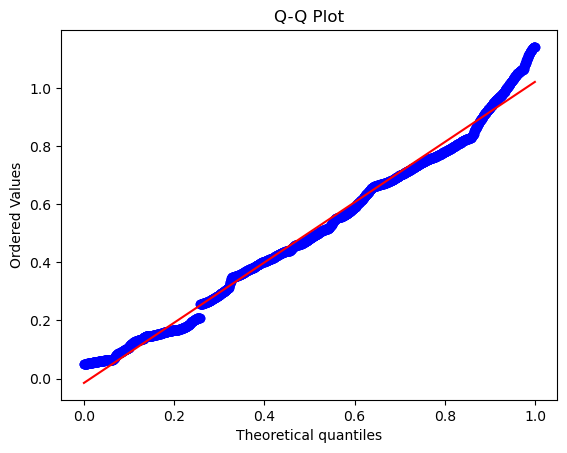

In [11]:
import scipy.stats as stats

stats.probplot(train['distance-to-solar-noon'], dist="uniform", plot=plt)
plt.title('Q-Q Plot');

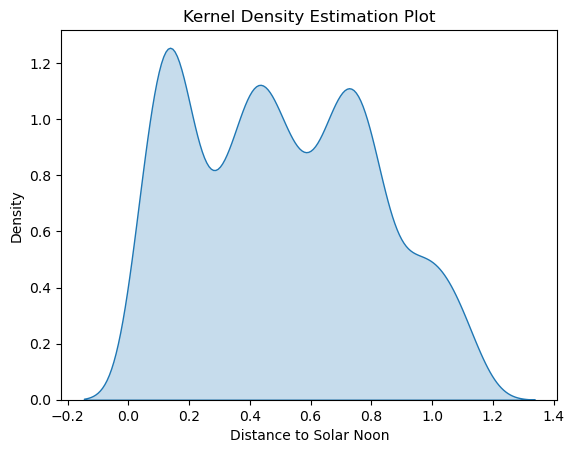

In [12]:
import seaborn as sns

sns.kdeplot(train['distance-to-solar-noon'], fill=True)
plt.title('Kernel Density Estimation Plot')
plt.xlabel('Distance to Solar Noon')
plt.ylabel('Density');

In [13]:
mean = train['distance-to-solar-noon'].mean()
median = train['distance-to-solar-noon'].median()
std_dev = train['distance-to-solar-noon'].std()

print(f"Mean: {mean}, Median: {median}, Standard Deviation: {std_dev}")

Mean: 0.5028317068193828, Median: 0.4808362370000001, Standard Deviation: 0.30088148690017014


In [14]:
morning_quantile = train['distance-to-solar-noon'].quantile(0.25)
afternoon_quantile =train['distance-to-solar-noon'].quantile(0.75)

# Create bins and labels
bins = [-float('inf'), morning_quantile, afternoon_quantile, float('inf')]
labels = ['night', 'morning', 'afternoon']

# Create 'time_of_day' column
train['time-of-day'] = pd.cut(train['distance-to-solar-noon'], bins=bins, labels=labels, right=False)

In [15]:
train.head()

,ID,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated,time-of-day
0,ID_000C6D,0.168350,52,6,1.1,0,6.0,80,8.0,766.572,22482,night
1,ID_001BF0,0.349153,63,26,16.3,4,10.0,81,16.0,760.984,1755,morning
2,ID_007316,0.857875,63,27,13.9,4,10.0,93,11.0,758.444,0,afternoon
3,ID_009D0E,0.150113,70,30,9.7,0,9.0,71,3.0,759.968,27771,night
4,ID_00B4A1,0.465986,63,27,16.0,1,10.0,72,16.0,759.460,1748,morning


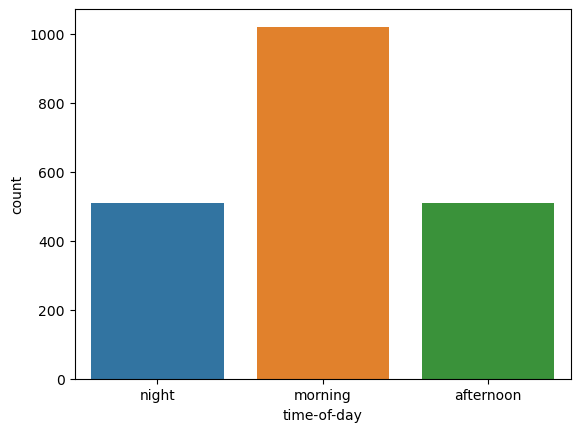

In [16]:
sns.countplot(data=train,x='time-of-day');

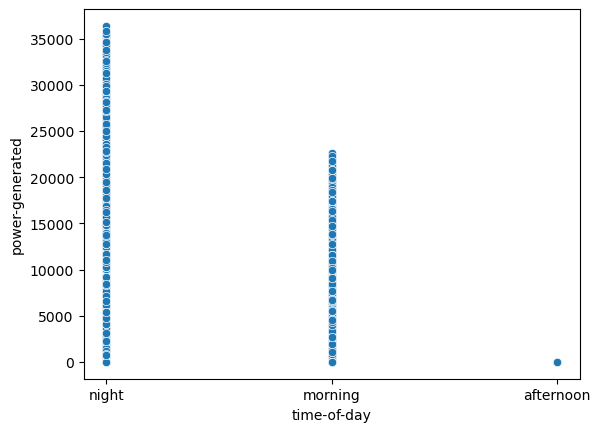

In [17]:
sns.scatterplot(data=train, x='time-of-day', y='power-generated');

In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Fit and transform the 'time_of_day' column
train['time-of-day-encod'] = label_encoder.fit_transform(train['time-of-day'])

# Display the result
print(train[['time-of-day', 'time-of-day-encod']])

     time-of-day  time-of-day-encod
0          night                  2
1        morning                  1
2      afternoon                  0
3          night                  2
4        morning                  1
...          ...                ...
2038   afternoon                  0
2039       night                  2
2040     morning                  1
2041     morning                  1
2042     morning                  1

[2043 rows x 2 columns]


In [19]:
train.isnull().sum()

ID                             0
distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    0
average-pressure-(period)      0
power-generated                0
time-of-day                    0
time-of-day-encod              0
dtype: int64

<AxesSubplot:>

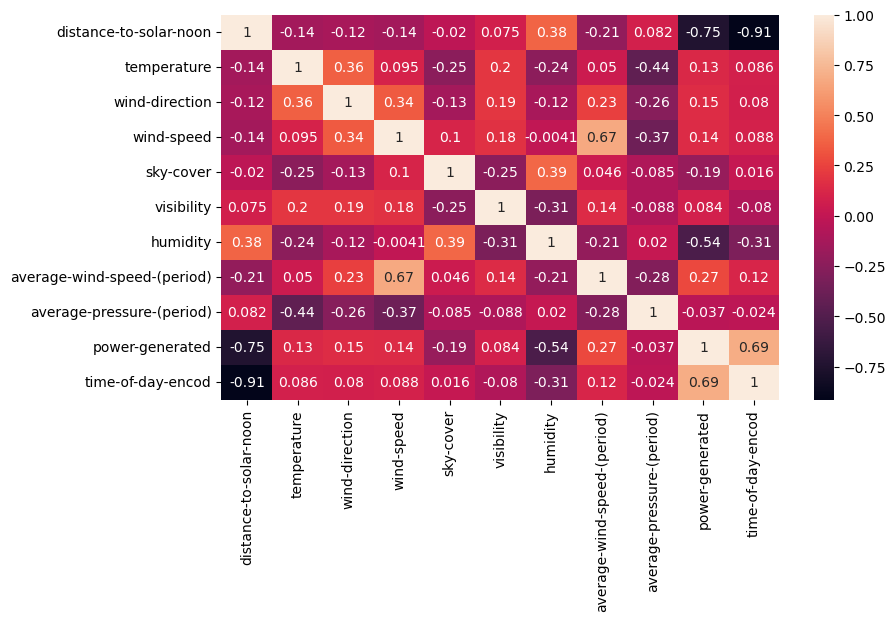

In [20]:
plt.figure(figsize=(9,5))
sns.heatmap(train.corr(), annot=True)

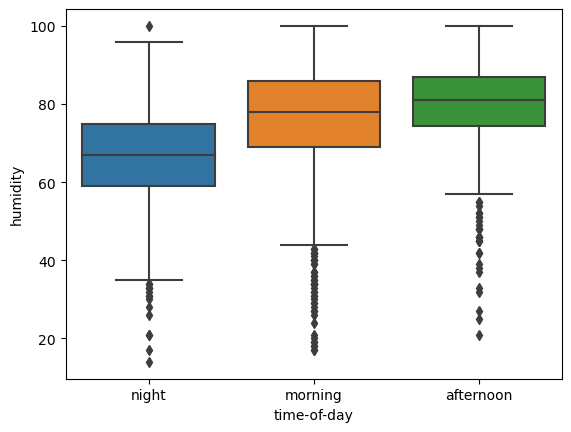

In [21]:
sns.boxplot(data =train, x='time-of-day',y='humidity');

In [22]:
train['wind-interaction'] = train['wind-direction'] * train['wind-speed']
train['weather-condition'] = train['sky-cover'] * train['visibility']

In [23]:
x = train['temperature'] * train['wind-speed']
y = train['humidity'] * train['wind-speed']

correlation = x.corr(y)
print(f"The correlation between 'temp_wind_speed_interaction' and 'humidity_wind_speed_interaction' is {correlation}")

The correlation between 'temp_wind_speed_interaction' and 'humidity_wind_speed_interaction' is 0.8782486206793623


In [30]:
test['wind-interaction'] = test['wind-direction'] * test['wind-speed']
test['weather-condition'] = test['sky-cover'] * test['visibility']
test['temp-wind-speed-interaction'] = test['temperature'] * test['wind-speed']
test['humidity-wind-speed-interaction'] = test['humidity'] * test['wind-speed']
test['temperature_squared'] = test['temperature'] ** 2
test['humidity-sqrt'] = test['humidity'].apply(lambda x: x ** 0.5)
test['wind-speed-interaction'] = test['wind-speed'] * test['average-wind-speed-(period)']
test['temp-humidity-interaction'] = test['temperature'] * test['humidity']
test["ap_temp"] = test["average-pressure-(period)"]/ test["temperature"]
test["dtsn_hum"] = test["distance-to-solar-noon"]/ test["humidity"]
test['wind_speed_ratio'] = test['wind-speed'] / test['wind-direction']
test['solar_angle'] = 180 - np.abs(test['distance-to-solar-noon'] * (180 / np.pi))

In [31]:
train['wind_speed_ratio'] = train['wind-speed'] / train['wind-direction']

In [32]:
train.isnull().sum()

ID                                 0
distance-to-solar-noon             0
temperature                        0
wind-direction                     0
wind-speed                         0
sky-cover                          0
visibility                         0
humidity                           0
average-wind-speed-(period)        0
average-pressure-(period)          0
power-generated                    0
time-of-day                        0
time-of-day-encod                  0
wind-interaction                   0
weather-condition                  0
temp-wind-speed-interaction        0
humidity-wind-speed-interaction    0
temperature_squared                0
humidity-sqrt                      0
wind-speed-interaction             0
temp-humidity-interaction          0
wind_speed_ratio                   0
dtype: int64

In [33]:
train.head()

,ID,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),...,time-of-day-encod,wind-interaction,weather-condition,temp-wind-speed-interaction,humidity-wind-speed-interaction,temperature_squared,humidity-sqrt,wind-speed-interaction,temp-humidity-interaction,wind_speed_ratio
0,ID_000C6D,0.168350,52,6,1.1,0,6.0,80,8.0,766.572,...,2,6.6,0.0,57.2,88.0,2704,8.944272,8.8,4160,0.183333
1,ID_001BF0,0.349153,63,26,16.3,4,10.0,81,16.0,760.984,...,1,423.8,40.0,1026.9,1320.3,3969,9.000000,260.8,5103,0.626923
2,ID_007316,0.857875,63,27,13.9,4,10.0,93,11.0,758.444,...,0,375.3,40.0,875.7,1292.7,3969,9.643651,152.9,5859,0.514815
3,ID_009D0E,0.150113,70,30,9.7,0,9.0,71,3.0,759.968,...,2,291.0,0.0,679.0,688.7,4900,8.426150,29.1,4970,0.323333
4,ID_00B4A1,0.465986,63,27,16.0,1,10.0,72,16.0,759.460,...,1,432.0,10.0,1008.0,1152.0,3969,8.485281,256.0,4536,0.592593


In [34]:
train.corr()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated,time-of-day-encod,wind-interaction,weather-condition,temp-wind-speed-interaction,humidity-wind-speed-interaction,temperature_squared,humidity-sqrt,wind-speed-interaction,temp-humidity-interaction,wind_speed_ratio
distance-to-solar-noon,1.000000,-0.143556,-0.120569,-0.139330,-0.019573,0.074929,0.375540,-0.210705,0.081541,-0.746604,-0.914193,-0.154128,0.005031,-0.165189,0.030745,-0.138352,0.360485,-0.182912,0.283431,0.007646
temperature,-0.143556,1.000000,0.362045,0.095388,-0.246555,0.199161,-0.235214,0.049696,-0.435909,0.130397,0.085974,0.201001,-0.191869,0.309430,0.031289,0.997083,-0.241221,-0.001224,0.295950,-0.218056
wind-direction,-0.120569,0.362045,1.000000,0.339186,-0.133404,0.194754,-0.115500,0.233771,-0.258870,0.154044,0.079870,0.571420,-0.082478,0.398399,0.272357,0.357308,-0.111362,0.223383,0.096263,-0.468997
wind-speed,-0.139330,0.095388,0.339186,1.000000,0.103912,0.175957,-0.004110,0.672491,-0.371142,0.140244,0.088211,0.947092,0.155742,0.971056,0.913297,0.075846,0.009893,0.820817,0.071308,0.402972
sky-cover,-0.019573,-0.246555,-0.133404,0.103912,1.000000,-0.245101,0.391506,0.045920,-0.085298,-0.193722,0.016219,0.000885,0.930458,0.050198,0.245476,-0.257501,0.384299,0.041139,0.245912,0.157778
visibility,0.074929,0.199161,0.194754,0.175957,-0.245101,1.000000,-0.308718,0.143226,-0.088281,0.083920,-0.079503,0.225441,0.102563,0.206965,0.067213,0.197484,-0.285258,0.132765,-0.166561,-0.102716
humidity,0.375540,-0.235214,-0.115500,-0.004110,0.391506,-0.308718,1.000000,-0.210077,0.019810,-0.536118,-0.306232,-0.053183,0.300704,-0.039667,0.360637,-0.250053,0.994925,-0.145494,0.851169,0.104563
average-wind-speed-(period),-0.210705,0.049696,0.233771,0.672491,0.045920,0.143226,-0.210077,1.000000,-0.281709,0.273059,0.117144,0.639127,0.088561,0.650072,0.519556,0.036065,-0.195461,0.911294,-0.169497,0.266263
average-pressure-(period),0.081541,-0.435909,-0.258870,-0.371142,-0.085298,-0.088281,0.019810,-0.281709,1.000000,-0.037092,-0.023749,-0.366361,-0.106351,-0.445031,-0.352909,-0.434877,0.014979,-0.264918,-0.204976,-0.072847
power-generated,-0.746604,0.130397,0.154044,0.140244,-0.193722,0.083920,-0.536118,0.273059,-0.037092,1.000000,0.690434,0.182554,-0.164786,0.163405,-0.107779,0.128002,-0.515918,0.244785,-0.446023,-0.020306


In [35]:
train.corr()['power-generated']

distance-to-solar-noon            -0.746604
temperature                        0.130397
wind-direction                     0.154044
wind-speed                         0.140244
sky-cover                         -0.193722
visibility                         0.083920
humidity                          -0.536118
average-wind-speed-(period)        0.273059
average-pressure-(period)         -0.037092
power-generated                    1.000000
time-of-day-encod                  0.690434
wind-interaction                   0.182554
weather-condition                 -0.164786
temp-wind-speed-interaction        0.163405
humidity-wind-speed-interaction   -0.107779
temperature_squared                0.128002
humidity-sqrt                     -0.515918
wind-speed-interaction             0.244785
temp-humidity-interaction         -0.446023
wind_speed_ratio                  -0.020306
Name: power-generated, dtype: float64

In [36]:
test.isnull().sum()

ID                             0
distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    1
average-pressure-(period)      0
dtype: int64

In [37]:
test[test['average-wind-speed-(period)'].isnull()]

,ID,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period)
129,ID_22B019,0.406143,57,12,2.8,2,4.0,96,NaN,766.064


In [38]:
test[test['wind-speed'] == 2.8]

,ID,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period)
129,ID_22B019,0.406143,57,12,2.8,2,4.0,96,NaN,766.064
141,ID_258FD2,1.129693,57,12,2.8,0,10.0,72,3.0,765.810
602,ID_B3E621,0.822526,57,12,2.8,0,10.0,70,0.0,764.794


In [39]:
train[train['wind-speed'] == 2.8]

,ID,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),...,time-of-day-encod,wind-interaction,weather-condition,temp-wind-speed-interaction,humidity-wind-speed-interaction,temperature_squared,humidity-sqrt,wind-speed-interaction,temp-humidity-interaction,wind_speed_ratio
589,ID_47F289,0.515358,57,12,2.8,1,10.0,54,0.0,764.540,...,1,33.6,10.0,159.6,151.2,3249,7.348469,0.0,3078,0.233333
614,ID_4C792C,0.713311,57,12,2.8,4,4.0,96,5.0,766.318,...,1,33.6,16.0,159.6,268.8,3249,9.797959,14.0,5472,0.233333
718,ID_59FDFF,0.098976,57,12,2.8,3,7.0,80,8.0,766.826,...,2,33.6,21.0,159.6,224.0,3249,8.944272,22.4,4560,0.233333
1591,ID_C9A644,0.208191,57,12,2.8,2,10.0,75,0.0,765.048,...,1,33.6,20.0,159.6,210.0,3249,8.660254,0.0,4275,0.233333
1762,ID_DF5C7C,1.020478,57,12,2.8,2,8.0,93,0.0,766.826,...,0,33.6,16.0,159.6,260.4,3249,9.643651,0.0,5301,0.233333


In [40]:
test['average-wind-speed-(period)'] = test['average-wind-speed-(period)'].fillna(0)

In [41]:
test.isnull().sum()

ID                             0
distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    0
average-pressure-(period)      0
dtype: int64

In [42]:
morning_quantile = test['distance-to-solar-noon'].quantile(0.25)
afternoon_quantile =test['distance-to-solar-noon'].quantile(0.75)

# Create bins and labels
bins = [-float('inf'), morning_quantile, afternoon_quantile, float('inf')]
labels = ['night', 'morning', 'afternoon']

# Create 'time_of_day' column
test['time-of-day'] = pd.cut(train['distance-to-solar-noon'], bins=bins, labels=labels, right=False)

In [43]:
test['time-of-day-encod'] = label_encoder.fit_transform(test['time-of-day'])

In [44]:
test.head()

,ID,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),time-of-day,time-of-day-encod
0,ID_00554F,0.290404,49,28,20.5,1,10.0,57,30.0,764.794,night,2
1,ID_00BD70,0.387376,65,30,8.6,4,10.0,84,0.0,758.190,morning,1
2,ID_00D02F,0.280247,62,29,11.5,1,10.0,68,21.0,757.174,afternoon,0
3,ID_010731,0.471963,60,29,15.0,1,9.0,86,20.0,760.476,night,2
4,ID_012016,0.203526,60,30,4.6,1,10.0,54,0.0,769.620,morning,1


In [45]:
test['wind-interaction'] = test['wind-direction'] * test['wind-speed']
test['weather-condition'] = test['sky-cover'] * test['visibility']
test['temp-wind-speed-interaction'] = test['temperature'] * test['wind-speed']
test['humidity-wind-speed-interaction'] = test['humidity'] * test['wind-speed']
test['temperature_squared'] = test['temperature'] ** 2
test['humidity-sqrt'] = test['humidity'].apply(lambda x: x ** 0.5)
test['wind-speed-interaction'] = test['wind-speed'] * test['average-wind-speed-(period)']
test['temp-humidity-interaction'] = test['temperature'] * test['humidity']

In [46]:
subm_test = test.drop(['ID','time-of-day'],axis=1)

In [47]:
subm_test.columns

Index(['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed',
       'sky-cover', 'visibility', 'humidity', 'average-wind-speed-(period)',
       'average-pressure-(period)', 'time-of-day-encod', 'wind-interaction',
       'weather-condition', 'temp-wind-speed-interaction',
       'humidity-wind-speed-interaction', 'temperature_squared',
       'humidity-sqrt', 'wind-speed-interaction', 'temp-humidity-interaction'],
      dtype='object')

In [48]:
df = train.drop(['ID','wind_speed_ratio','time-of-day'],axis = 1)

In [49]:
df.columns

Index(['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed',
       'sky-cover', 'visibility', 'humidity', 'average-wind-speed-(period)',
       'average-pressure-(period)', 'power-generated', 'time-of-day-encod',
       'wind-interaction', 'weather-condition', 'temp-wind-speed-interaction',
       'humidity-wind-speed-interaction', 'temperature_squared',
       'humidity-sqrt', 'wind-speed-interaction', 'temp-humidity-interaction'],
      dtype='object')

## MODEL TRAINING

In [50]:
X= df.drop('power-generated',axis=1)

In [51]:
y=df['power-generated']

In [76]:
scaler = StandardScaler()

In [43]:
# Create an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Random State', 'Test Size', 'RMSE', 'Accuracy'])

# Iterate over random states from 0 to 100
for random_state in range(101):
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state)
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Initialize and fit the Gradient Boosting regressor
    reg = GradientBoostingRegressor()
    reg.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = reg.predict(X_test)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Calculate accuracy
    accuracy = r2_score(y_test, y_pred)

    # Append results to the DataFrame
    results_df = results_df.append({
        'Random State': random_state,
        'Test Size': 0.1,
        'RMSE': rmse,
        'Accuracy': accuracy
    }, ignore_index=True)

# Sort the DataFrame based on RMSE in ascending order
results_df = results_df.sort_values(by='RMSE')

# Display the sorted DataFrame
print(results_df)

    Random State  Test Size         RMSE  Accuracy
25          25.0        0.1  1867.395334  0.958376
20          20.0        0.1  2078.317763  0.958304
12          12.0        0.1  2130.742698  0.961331
0            0.0        0.1  2281.265927  0.953215
94          94.0        0.1  2294.855799  0.949307
..           ...        ...          ...       ...
17          17.0        0.1  3931.000408  0.829758
81          81.0        0.1  4050.044152  0.844398
88          88.0        0.1  4124.406119  0.837670
74          74.0        0.1  4145.825351  0.842019
73          73.0        0.1  4631.576013  0.777277

[101 rows x 4 columns]


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=25)

In [77]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
subm_test = scaler.transform(subm_test)

In [76]:
from sklearn.ensemble import AdaBoostRegressor
models = {
    'Linear Regression': LinearRegression(),
    'SVR': SVR(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),
    'AdaBoost': AdaBoostRegressor()
}

results = {'Model': [], 'R^2': [], 'RMSE': []}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluate using R^2 and RMSE
    r_squared = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Store results in the dictionary
    results['Model'].append(name)
    results['R^2'].append(r_squared)
    results['RMSE'].append(rmse)

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

               Model       R^2          RMSE
0  Linear Regression  0.674841   5219.279328
1                SVR -0.296658  10422.583013
2      Random Forest  0.950789   2030.463685
3      Decision Tree  0.879795   3173.394475
4  Gradient Boosting  0.955768   1925.006043
5            XGBoost  0.950501   2036.385346
6           AdaBoost  0.879582   3176.201942


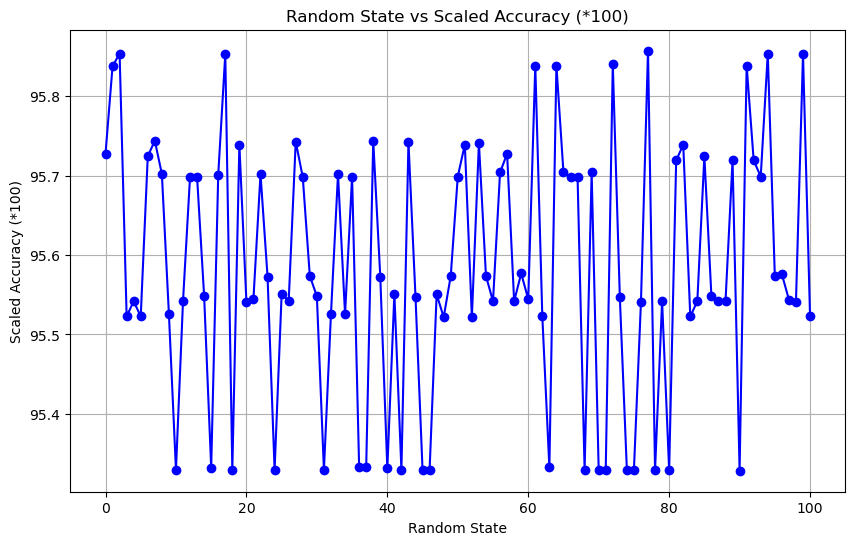

In [91]:
random_states = range(101)
scaled_accuracies = []

for random_state in random_states:
    model = GradientBoostingRegressor(random_state=random_state)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = r2_score(y_test, y_pred) * 100  # Multiply by 100
    scaled_accuracies.append(accuracy)

# Plot the graph for scaled accuracies
plt.figure(figsize=(10, 6))
plt.plot(random_states, scaled_accuracies, marker='o', linestyle='-', color='b')
plt.title('Random State vs Scaled Accuracy (*100)')
plt.xlabel('Random State')
plt.ylabel('Scaled Accuracy (*100)')
plt.grid(True)
plt.show()

In [77]:
results_df = pd.DataFrame(columns=['Random State', 'Accuracy (R^2)', 'RMSE'])

# Iterate over random states from 0 to 100
for random_state in range(101):
    # Initialize the Gradient Boosting model
    model = GradientBoostingRegressor(random_state=random_state)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy (R^2) and RMSE
    accuracy = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Append results to DataFrame
    results_df = results_df.append({'Random State': random_state, 'Accuracy (R^2)': accuracy, 'RMSE': rmse}, ignore_index=True)

# Sort the DataFrame based on Accuracy (R^2)
results_df = results_df.sort_values(by='Accuracy (R^2)', ascending=False)

# Print the sorted DataFrame
print(results_df)

    Random State  Accuracy (R^2)         RMSE
77          77.0        0.958572  1862.991444
2            2.0        0.958536  1863.792138
94          94.0        0.958536  1863.792138
17          17.0        0.958527  1864.002648
99          99.0        0.958527  1864.002648
..           ...             ...          ...
18          18.0        0.953293  1978.121499
74          74.0        0.953293  1978.121499
75          75.0        0.953293  1978.121499
68          68.0        0.953293  1978.121499
90          90.0        0.953284  1978.319844

[101 rows x 3 columns]


In [54]:
model = GradientBoostingRegressor(random_state=77)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy (R^2) and RMSE
accuracy = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\nPerformance Metrics on Test Set (Gradient Boosting):")
print(f"R-squared (Accuracy): {accuracy}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Performance Metrics on Test Set (Gradient Boosting):
R-squared (Accuracy): 0.9585717733843161
Root Mean Squared Error (RMSE): 1862.9914


In [55]:
result_dict = {'Actual': y_test, 'Predicted': y_pred}

comparison_df = pd.DataFrame(result_dict)

In [56]:
comparison_df

,Actual,Predicted
446,0,4722.129168
1147,3,-88.984588
1594,0,-152.782731
1031,0,193.501154
1673,0,3.584245
...,...,...
1247,0,-399.741236
196,0,760.211066
983,24644,19304.133053
1763,0,-96.581774


In [57]:
y_pred_non_negative = np.maximum(y_pred, 0)

In [58]:
r2_gb = r2_score(y_test, y_pred_non_negative)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_non_negative))

print("\nPerformance Metrics on Test Set (Gradient Boosting):")
print(f"R-squared (Accuracy): {r2_gb:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gb:.4f}")


Performance Metrics on Test Set (Gradient Boosting):
R-squared (Accuracy): 0.9587
Root Mean Squared Error (RMSE): 1859.7499


In [59]:
result_dict = {'Actual': y_test, 'Predicted': y_pred_non_negative}
comparison_df = pd.DataFrame(result_dict)

In [60]:
comparison_df 

,Actual,Predicted
446,0,4722.129168
1147,3,0.000000
1594,0,0.000000
1031,0,193.501154
1673,0,3.584245
...,...,...
1247,0,0.000000
196,0,760.211066
983,24644,19304.133053
1763,0,0.000000


In [61]:
subm_test

array([[-0.69151708, -1.36328195,  0.43504955, ..., -1.04548243,
         3.76213359, -1.61924722],
       [-0.36988029,  0.95641924,  0.72736214, ...,  0.66634842,
        -0.98889767,  1.27730494],
       [-0.72520617,  0.52147526,  0.58120585, ..., -0.30749766,
         0.87675119, -0.07376776],
       ...,
       [ 0.20508661,  0.37649394,  0.28889326, ...,  0.31303808,
        -0.05568698,  0.51488289],
       [ 0.4590842 , -0.34841268, -1.02651338, ..., -0.56841984,
        -0.22409752, -0.76016482],
       [-0.23051334,  1.10140056,  0.43504955, ...,  0.66634842,
        -0.58332183,  1.36853493]])

In [62]:
df1=pd.DataFrame(subm_test, columns=X.columns)

In [63]:
import numpy as np
import pandas as pd

# Assuming df is your DataFrame
# Check for infinity in the DataFrame
is_inf_present = np.isinf(df1).any().any()

if is_inf_present:
    print("Infinity values are present in the DataFrame.")
else:
    print("No infinity values found in the DataFrame.")


No infinity values found in the DataFrame.


In [64]:
final_pred = model.predict(subm_test)

In [65]:
len(final_pred)

877

In [66]:
subm['ID']

0      ID_00554F
1      ID_00BD70
2      ID_00D02F
3      ID_010731
4      ID_012016
         ...    
872    ID_FF6826
873    ID_FFBF07
874    ID_FFC86B
875    ID_FFCD82
876    ID_FFE552
Name: ID, Length: 877, dtype: object

In [67]:
test['ID']

0      ID_00554F
1      ID_00BD70
2      ID_00D02F
3      ID_010731
4      ID_012016
         ...    
872    ID_FF6826
873    ID_FFBF07
874    ID_FFC86B
875    ID_FFCD82
876    ID_FFE552
Name: ID, Length: 877, dtype: object

In [68]:
final_pred_non_negative = np.maximum(final_pred, 0)

In [69]:
subm['power_generated'] =final_pred_non_negative

In [70]:
subm.isnull().sum()

ID                 0
power_generated    0
dtype: int64

In [71]:
subm

,ID,power_generated
0,ID_00554F,20555.829991
1,ID_00BD70,1436.584836
2,ID_00D02F,17532.646811
3,ID_010731,1419.398002
4,ID_012016,20369.283844
...,...,...
872,ID_FF6826,0.000000
873,ID_FFBF07,7432.624048
874,ID_FFC86B,0.000000
875,ID_FFCD82,0.000000


In [72]:
subm.to_csv('final_submissiongbfinal.csv', index=False)

In [73]:
pd.read_csv('final_submissiongbfinal.csv')

,ID,power_generated
0,ID_00554F,20555.829991
1,ID_00BD70,1436.584836
2,ID_00D02F,17532.646811
3,ID_010731,1419.398002
4,ID_012016,20369.283844
...,...,...
872,ID_FF6826,0.000000
873,ID_FFBF07,7432.624048
874,ID_FFC86B,0.000000
875,ID_FFCD82,0.000000


In [75]:
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or use the sorted DataFrame
print(feature_importance_df)

                            Feature  Importance
0            distance-to-solar-noon    0.842268
4                         sky-cover    0.071286
15                    humidity-sqrt    0.026460
6                          humidity    0.013668
2                    wind-direction    0.011624
10                 wind-interaction    0.011456
11                weather-condition    0.003892
8         average-pressure-(period)    0.003084
13  humidity-wind-speed-interaction    0.002932
16           wind-speed-interaction    0.002678
17        temp-humidity-interaction    0.002557
3                        wind-speed    0.002330
12      temp-wind-speed-interaction    0.002316
7       average-wind-speed-(period)    0.001565
1                       temperature    0.000888
14              temperature_squared    0.000482
5                        visibility    0.000257
9                 time-of-day-encod    0.000254
